In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# set working directory
os.chdir("/Edwisor/Python")

In [3]:
# Loading the train data.
bike_data=pd.read_csv("/Users/subhadeep/Downloads/day.csv")

In [4]:
bike_data.shape

(731, 16)

In [5]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Missing Value Analysis :-

In [6]:
bike_data.isnull().sum()
# we can see that there are no missing Value in the given data.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
## We are dropping variables casual and registered as cnt variable is already there which is summation of casual and registered
bike_data=bike_data.drop(['casual','registered'],axis=1)

In [8]:
bike_data['dteday'] =  pd.to_datetime(bike_data['dteday'], format='%Y-%m-%d')

In [9]:
bike_data['day'] = bike_data['dteday'].apply(lambda r:r.day)

In [10]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,5


In [11]:
# now we are dropping variable dteday as day , month and year is already present in the data. also dropping instant.
bike_data=bike_data.drop(['dteday','instant'],axis=1)

In [12]:
cnames = ["yr","season","mnth","holiday","workingday","weekday","weathersit"]
pnames = ["temp","atemp","hum","windspeed","day"]
#cnames consists of categorical variables and pnames consists of numerical 

## VISUALISATION:-

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# First of all we exploring all the distributions of categorical variables
# taking season variable
bike_data.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

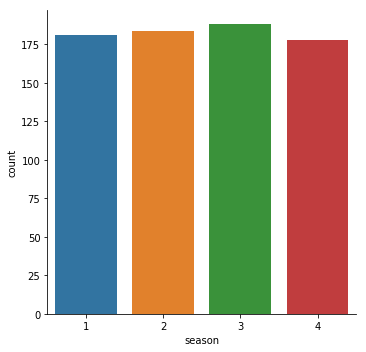

In [15]:
sns.factorplot(x='season',data=bike_data,kind='count',size=5)
# here season 1= spring, 2= summer, 3= fall, 4= winter

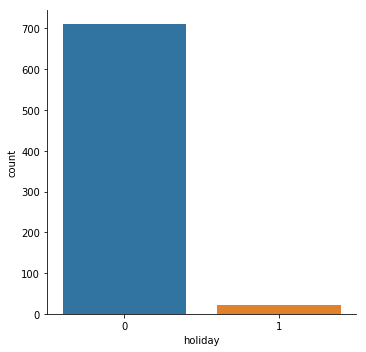

In [16]:
# Holiday:-
sns.factorplot(x='holiday',data=bike_data,kind='count',size=5)
# holiday as 1 and non holiday as 0. majority of the data is for non holiday

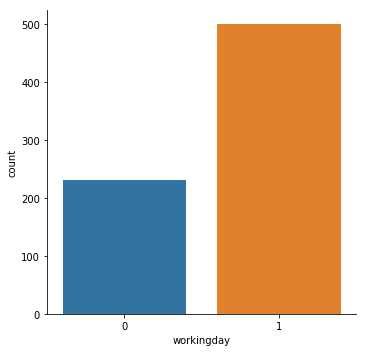

In [17]:
# Working day :-
sns.factorplot(x='workingday',data=bike_data,kind='count',size=5)
# weekend is 0 and for non weekend is 1
# cleary it s visible that majority of the data is for working day

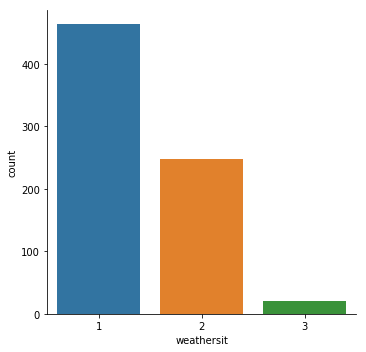

In [18]:
# Weathersit
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
sns.factorplot(x='weathersit',data=bike_data,kind='count',size=5)

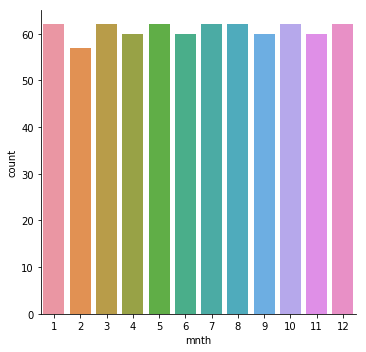

In [19]:
sns.factorplot(x='mnth',data=bike_data,kind='count',size=5)

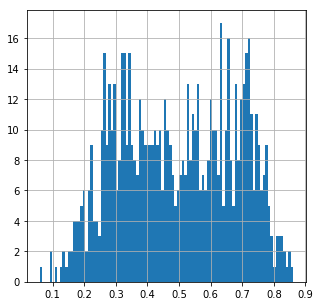

In [20]:
%matplotlib inline
bike_data.temp.hist(figsize=(5,5),bins=100)
plt.show()

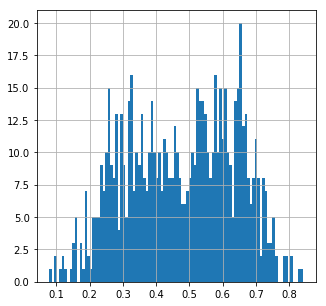

In [21]:
%matplotlib inline
bike_data.atemp.hist(figsize=(5,5),bins=100)
plt.show()

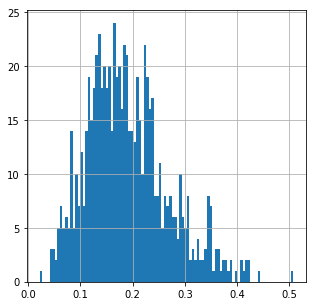

In [22]:
%matplotlib inline
bike_data.windspeed.hist(figsize=(5,5),bins=100)
plt.show()

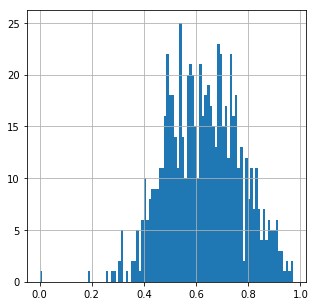

In [23]:
%matplotlib inline
bike_data.hum.hist(figsize=(5,5),bins=100)
plt.show()

## FEATURE SELECTION:-

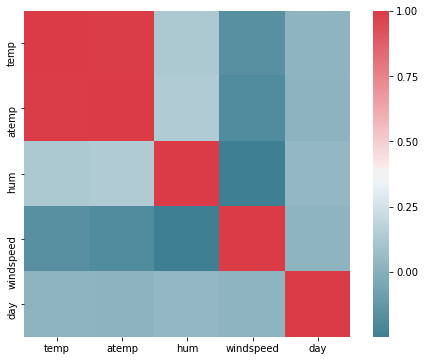

In [24]:
## set the width and height of the plot
# subplot will decide the height and width of the plot
f, ax = plt.subplots(figsize=(8,6))

# generating correlation matrix
bike_corr = bike_data.loc[:,pnames]
corr=bike_corr.corr()

## mask will crate individual blocks in correlation matrix, np.zeroes will create square blocks in whole paine
##cmap. diverse_palette will set the colours
## plot using seaborn libraray
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
           square= True,ax=ax)
# from the heatmap we can see that temp and atemp is highly correlated. so we will drop atemp

In [25]:
bike_data=bike_data.drop(['atemp'],axis=1)

In [26]:
from sklearn.ensemble import RandomForestRegressor
bike_rf = RandomForestRegressor(n_estimators=100,max_features=4,n_jobs=-1)

In [27]:
x=bike_data.drop(['cnt'],axis=1)

In [28]:
y=bike_data['cnt']

In [29]:
bike_rf.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [30]:
# feature importance
feature_imp = pd.Series(bike_rf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp
# we can see that temp variable is the most important variable as it is contributing 30.46%

temp          0.294049
yr            0.286949
season        0.131943
mnth          0.091395
hum           0.066963
windspeed     0.042998
weathersit    0.032107
day           0.026690
weekday       0.018117
workingday    0.006036
holiday       0.002752
dtype: float64

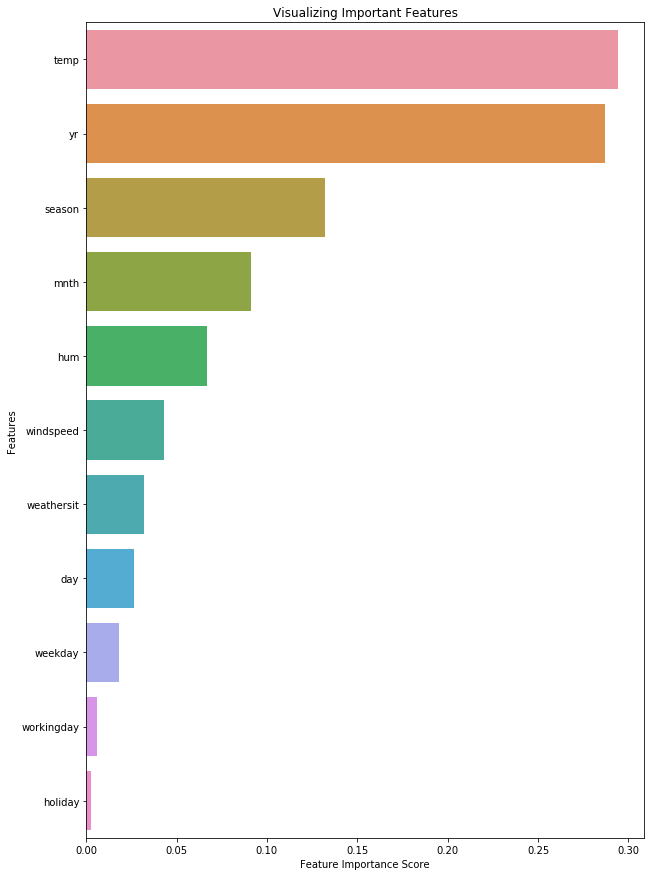

In [31]:
%matplotlib inline
# Creating a bar plot
f, ax = plt.subplots(figsize=(10,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

## Outlier Analysis :- 

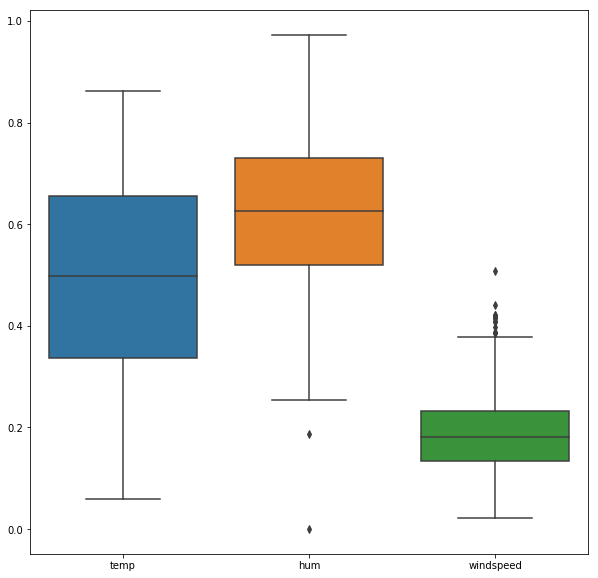

In [32]:
# just to visualize.
sns.boxplot(data=bike_data[['temp','hum','windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)
# we can see that there are no outliers present in temp variable. 

In [33]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000,31.000000


In [34]:
col_names = ["temp","hum","windspeed"]

In [35]:
for i in col_names:
    print(i)
    q75, q25 =np.percentile(x.loc[:,i],[75,25])
    iqr= q75-q25
    
    min= q25-(iqr*1.5)
    max= q75+ (iqr*1.5)
    
    print(min)
    print(max)

temp
-0.14041600000000015
1.1329160000000003
hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


In [36]:
# from the above description we can see that the outliers present in the variable windspeed in spread just over the whiskers
# so we are taking all the data into considerations. 
# In humidity variable only 2 variables falls into outlier category. out of that one observatio has recorded with 0.
# so we are deleting that observation.
d=bike_data[bike_data['hum'] < 0.20468725]

In [37]:
print(d)

    season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
49       1   0     2        0        6           0           1  0.399167   
68       1   0     3        0        4           1           3  0.389091   

         hum  windspeed   cnt  day  
49  0.187917   0.507463  1635   19  
68  0.000000   0.261877   623   10  


In [38]:
bike_data.drop(bike_data[bike_data['hum'] == 0.000000].index, inplace = True) 

In [39]:
bike_data.shape

(730, 12)

## Feature Scaling :-

In [40]:
## we can see that every variables are not normally distributed 
# hence will go for normalization instead of standarization.
##NORMALIZATION
for i in col_names:
    print(i)
    bike_data[i]= (bike_data[i] - np.min(bike_data[i]))/(np.max(bike_data[i]) - np.min(bike_data[i]))

temp
hum
windspeed


## Model Development :-

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,train_test_split

In [42]:
x_new=bike_data.drop(['cnt'],axis=1)
y_new=bike_data['cnt']

In [43]:
# split the data, 75% into tarin and 25% into test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=2)

In [44]:
print (x_train.shape,y_train.shape)
print (x_test.shape,y_test.shape)

(547, 11) (547,)
(183, 11) (183,)


In [45]:
ln=LinearRegression()

In [46]:
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
predict_ln=ln.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [49]:
r_square=r2_score(predict_ln,y_test)
print(r_square)

0.7330873930285499


In [50]:
rmse=np.sqrt(mean_squared_error(predict_ln,y_test))
print(rmse)

869.3162345064748


In [51]:
mae=mean_absolute_error(predict_ln,y_test)
print(mae)

659.8206328581629


In [52]:
# calculate
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [53]:
MAPE(y_test,predict_ln)

17.441670489849336

In [54]:
coeff_df = pd.DataFrame(ln.coef_, x_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
season,531.222136
yr,1978.475730
mnth,-37.803750
holiday,-707.134880
weekday,47.270259
workingday,133.069007
weathersit,-625.662543
temp,4102.650065
hum,-841.697183
windspeed,-1283.050299


In [55]:
print(ln.intercept_)

1917.3908095252368


In [56]:
import statsmodels.api as sm

/Users/subhadeep/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [57]:
model=sm.OLS(y_train,x_train).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        08:38:20   Log-Likelihood:                -4511.7
No. Observations:                 547   AIC:                             9045.
Df Residuals:                     536   BIC:                             9093.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       606.0035     62.568      9.686      0.000     483.096     728.911
yr          2121.1242     79.011     26.846      0.000    1965.914    2276.334
mnth         -36.4130     19.480     -1.869      0.062     -74.679       1.853
holiday     -470.7400    238.748     -1.972      0.049    -939.737      -1.743
weekday       88.2888     19.560      4.514      0.000      49.865     126.713
workingday   288.9704     87.157      3.316      0.001     117.758     460.182
weathersit  -564.1636    103.524     -5.450      0.000    -767.526    -360.801
temp        4530.0639    189.496     23.906      0.000    4157.818    4902.310
hum           39.1949    299.271      0.131      0.896    -548.694     627.083
windspeed   -126.3333    229.303     -0.551      0.582    -576.776     324.109
day           -1.7387      4.379     -0.397      0.691     -10.341       6.863
==============================================================================
Omnibus:                       96.267   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.194
Skew:                          -0.932   Prob(JB):                     4.17e-48
Kurtosis:                       5.470   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
predict_ols=model.predict(x_test)

In [60]:
rmse_model=np.sqrt(mean_squared_error(predict_ols,y_test))
print(rmse_model)

895.2577001702465


In [61]:
mae_model=mean_absolute_error(predict_ols,y_test)
print(mae_model)

694.4300139121335


In [62]:
MAPE(y_test,predict_ols)

19.95691893956228

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [64]:
## building a roandom forest classifier 
rf=RandomForestRegressor(verbose=1,n_jobs=-1,)

In [65]:
# making a param)dist , a dictonary for hyperparameter tuning.
param_dist = {"n_estimators":[20,50,100,200],
              "max_depth": [3,5,6,8],
              "max_features": [2,5,7,8],
              "min_samples_split": [2,5,8,10],
              "min_samples_leaf": [1,2,5,10]
             }

n_iter_search = 20

In [66]:
# making a randomizedsearCV for best possible combination parameter. here we are doing 10 fold cross validation
# with 20 times . 
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10)
random_search.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 o

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state=No

In [67]:
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.best_estimator_)

0.8735852433247712
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 8}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)


In [68]:
model_rf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)

In [69]:
model_rf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)

In [70]:
predicted_rf=model_rf.predict(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [71]:
rmse_model_rf=np.sqrt(mean_squared_error(predicted_rf,y_test))
print(rmse_model_rf)

681.3344258645441


In [72]:
mae_model_rf=mean_absolute_error(predicted_rf,y_test)
print(mae_model_rf)

493.01581565328405


In [73]:
MAPE(y_test,predicted_rf)

14.005646435851185

In [74]:
print(model_rf.feature_importances_)

[0.11608055 0.28375354 0.03679957 0.00234484 0.00809988 0.00301049
 0.01791058 0.41714769 0.06516398 0.032038   0.01765088]


In [75]:
feature_imp_rf = pd.Series(model_rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp_rf

temp          0.417148
yr            0.283754
season        0.116081
hum           0.065164
mnth          0.036800
windspeed     0.032038
weathersit    0.017911
day           0.017651
weekday       0.008100
workingday    0.003010
holiday       0.002345
dtype: float64

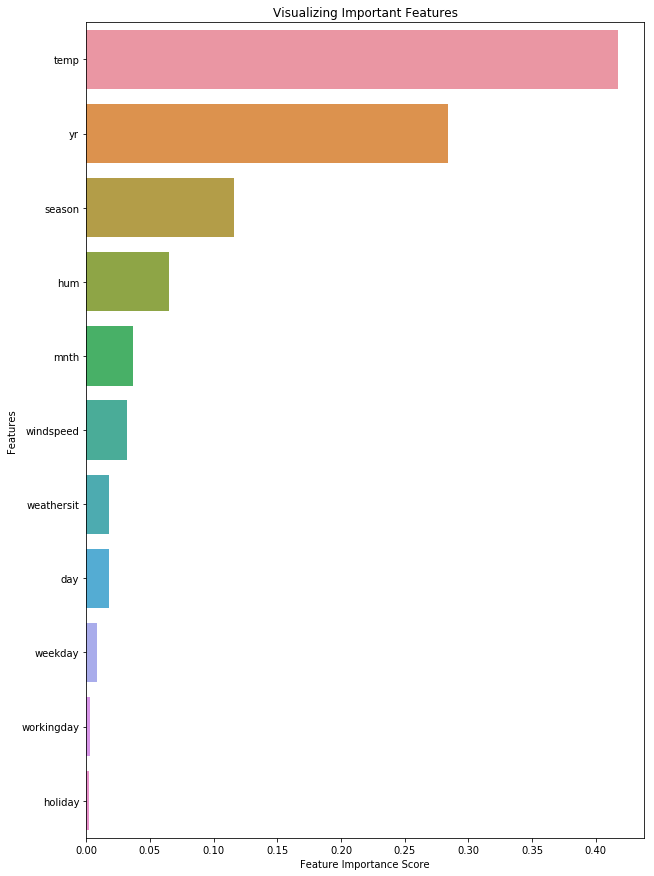

In [76]:
%matplotlib inline
# Creating a bar plot
f, ax = plt.subplots(figsize=(10,15))
sns.barplot(x=feature_imp_rf, y=feature_imp_rf.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [77]:
new_data=bike_data.drop(['holiday','workingday','weekday','weathersit','day','cnt'],axis=1)
y_data=bike_data['cnt']

In [78]:
# split the data, 75% into tarin and 25% into test data
x1_train,x1_test,y1_train,y1_test=train_test_split(new_data,y_data,test_size=0.25,random_state=2)

In [79]:
print (x1_train.shape,y1_train.shape)
print (x1_test.shape,y1_test.shape)

(547, 6) (547,)
(183, 6) (183,)


In [80]:
## building a roandom forest classifier 
rf1=RandomForestRegressor(verbose=1,n_jobs=-1,)

In [81]:
# making a param)dist , a dictonary for hyperparameter tuning.
param_dist = {"n_estimators":[20,50,100,200],
              "max_depth": [3,5,6,8],
              "max_features": [2,3,4,5,6],
              "min_samples_split": [2,5,8,10],
              "min_samples_leaf": [1,2,5,10]
             }

n_iter_search = 20

In [82]:
# making a randomizedsearCV for best possible combination parameter. here we are doing 10 fold cross validation
# with 20 times . 
random_search1 = RandomizedSearchCV(rf1, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10)
random_search1.fit(x1_train, y1_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[P

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 o

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 o

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Paral

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 o

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state=No

In [83]:
print(random_search1.best_score_)
print(random_search1.best_params_)
print(random_search1.best_estimator_)

0.8671222183001244
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 8}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)


In [84]:
model_rf_new=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False
)

In [85]:
model_rf_new.fit(x1_train,y1_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=1,
                      warm_start=False)

In [86]:
predicted_rf_new=model_rf_new.predict(x1_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [87]:
rmse_model_rf_new=np.sqrt(mean_squared_error(predicted_rf_new,y1_test))
print(rmse_model_rf_new)

746.6529093593567


In [88]:
mae_model_rf_new=mean_absolute_error(predicted_rf_new,y1_test)
print(mae_model_rf_new)

530.2976345018095


In [89]:
MAPE(y1_test,predicted_rf_new)

15.989554219409591

In [90]:
feature_imp_rf_new = pd.Series(model_rf_new.feature_importances_,index=x1_train.columns).sort_values(ascending=False)
feature_imp_rf_new

temp         0.474611
yr           0.300540
season       0.099584
hum          0.076254
windspeed    0.027047
mnth         0.021964
dtype: float64

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knn=KNeighborsRegressor()

In [93]:
params = {'n_neighbors':[3,4,5,6,7,8],
          'weights':['uniform', 'distance'],
          'n_jobs':[-1]}

In [94]:
random_search = RandomizedSearchCV(knn, param_distributions=params,
                                   n_iter=10,cv=10,n_jobs=-1)
random_search.fit(x_train, y_train)

/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_jobs': [-1],
                                        'n_neighbors': [3, 4, 5, 6, 7, 8],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [95]:
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.best_estimator_)

0.4068642100333054
{'weights': 'distance', 'n_neighbors': 3, 'n_jobs': -1}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')


In [96]:
knn_model=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')

In [97]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')

In [98]:
predict_knn=knn_model.predict(x_test)

In [99]:
rmse_model_knn=np.sqrt(mean_squared_error(predict_knn,y_test))
print(rmse_model_knn)

1422.157651387773


In [100]:
mae_knn=mean_absolute_error(predict_knn,y_test)
print(mae_knn)

1133.484758178544


In [101]:
MAPE(y_test,predict_knn)

34.4083920089983

In [102]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [105]:
xgb1=XGBRegressor(njobs=-1,scale_pos_weight=9)

In [106]:
# hyperparameter tuning set for param_dist
param_dist1 = {"learning_rate":[0.05,0.1,0.2], 
               "n_estimators":[100,150,200,250],
               "max_depth": [3,4,5],
               "subsample":[0.8,1,0.5],
               "colsample_bytree":[0.6,0.7,0.8]
              }
n_iter_search=20

In [107]:
# hyperparameter tuning for xgbooost 
random_search = RandomizedSearchCV(xgb1, param_distributions=param_dist1,
                                   n_iter=n_iter_search,cv=10)
random_search.fit(x_train, y_train)

[08:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[08:42:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, njobs=-1, nthread=None,
                                          objective='reg:linear'...
                                          reg_lambda=1, scale_pos_weight=9,
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   i

In [108]:
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.best_estimator_)

0.9058043976384516
{'subsample': 0.5, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, njobs=-1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=9,
             seed=None, silent=None, subsample=0.5, verbosity=1)


In [109]:
# algorithm with bast combination of parameter set after doing hyperparameter tuning.
xgb_random=XGBRegressor(learning_rate=0.05,n_estimators=250,max_depth=5,colsample_bytree=0.8,subsample=0.5)

In [110]:
xgb_random.fit(x_train,y_train)

[08:45:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [111]:
predicted_xgb=xgb_random.predict(x_test)

In [112]:
MAPE(y_test,predicted_xgb)

10.933560240685981

In [116]:
rmse_xgb=np.sqrt(mean_squared_error(predicted_xgb,y_test))
print(rmse_xgb)

634.7330890488727
